In [1]:
from FunctionsCopy1 import *
import ot

In [2]:
# True postive and False positive

def true_false_rate(comp_alien,Lower_band,Upper_band,test_size):

    True_positive = []
    False_positive = []


    for i in range(test_size):
        if comp_alien[i] >= Lower_band and comp_alien[i] <= Upper_band:
            True_positive.append(1)

        else:
            False_positive.append(1)

    positive_rate = np.sum(True_positive)/test_size
    false_rate = np.sum(False_positive)/test_size
    
    return positive_rate,false_rate

In [3]:
## import images

alien = 1 - plt.imread('/Users/Mehdi/Downloads/Alien.png')[:, :, 2]
apple = 1 - plt.imread('/Users/Mehdi/Desktop/Screenshot 2021-08-30 at 13.35.45.png')[:, :, 2]

In [4]:
## Add noise with salt and peper

max_amount = 0.02
amount = 0
noise_image = []
num = 5

for i in range(num):
    amount = amount + max_amount/num
    noise_image.append(pep_salt(alien,amount))


/Users/Mehdi/Desktop/Unige/Master Thesis/Codes/Clear implementation/FunctionsCopy1.py:197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
/Users/Mehdi/Desktop/Unige/Master Thesis/Codes/Clear implementation/FunctionsCopy1.py:202: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0


(-0.5, 224.5, 224.5, -0.5)

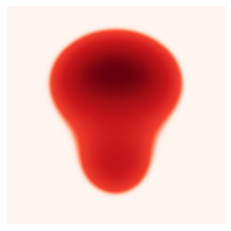

In [5]:
## Extract the barycenter with equal weights

weights = np.repeat(1/num, num)
reg = 0.04
cm = 'Reds'

barycenter = ot.bregman.convolutional_barycenter2d(np.array(noise_image), reg, weights)

plt.imshow(barycenter, cmap=cm)
plt.axis('off')

1.539170508580998
2.0460829520506527
2.0967741937874216
0.580645164295934
1.437788021461898
3.3456221197555847
2.1059907841933216
1.3594470066453908
0.3870967770315885
2.373271890212772
2.4055299550934377
3.1105990787795044
1.9907834107797444
1.3686635978253787
1.4792626753017772
1.5668202790238697
0.6129032284776742
1.548387098192385
2.110599080426858
1.4654377895740462
2.2718894032415946
1.423963135154171
1.1935483890723608
1.9216589873714838
2.2165898667592763


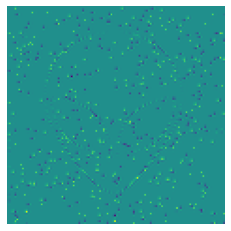

In [6]:
## To class the imgaes by TSP

rng = len(noise_image)
EMD_mat = np.empty((rng,rng))
EMD_mat[:] = np.nan # to avoid the bug of the double for loop

for i in range(rng):
    for j in range(rng):
        warnings.filterwarnings("ignore")
        EMD_mat[i,j] = wav_EMD(noise_image[i],noise_image[j])
        print(EMD_mat[i,j])

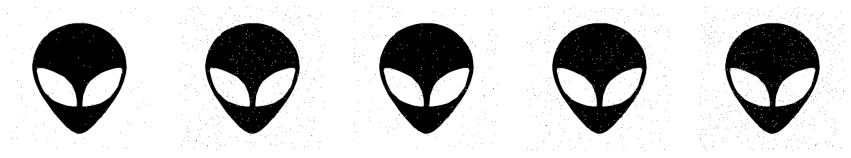

In [7]:
## TSP

permutation, distance = solve_tsp_dynamic_programming(EMD_mat)

count = 0
cm = 'Greys'
rnoise_image = []

fig, axes1 = plt.subplots(1,len(permutation),figsize=(15,15))
for k in range(len(permutation)):
        axes1[k].set_axis_off()
        axes1[k].imshow(noise_image[permutation[k]], cmap = cm)
        rnoise_image.append(noise_image[permutation[k]])
        count = count + 1 

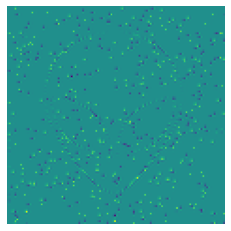

In [8]:
EMD_hist = []

for i in range(rng):
    EMD_hist.append(wav_EMD(barycenter,rnoise_image[i]))

In [9]:
## Extract the quantile

sort_EMD_hist = np.array(EMD_hist)
sort_EMD_hist.sort()
quantile = np.array([np.percentile(sort_EMD_hist, 25),np.percentile(sort_EMD_hist, 75)])

We accept that this is an alien


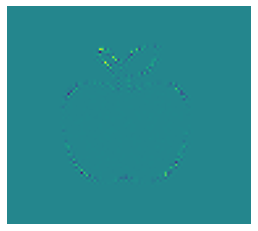

In [10]:
## Compare with apple

EMD = wav_EMD(barycenter,apple)

Lower_band = quantile[0]
Upper_band = quantile[1]
    
if EMD >= Lower_band and EMD <= Upper_band:
    print('We accept that this is an alien')
        
else:
    print('we reject that this is an alien')

We accept that this is an alien


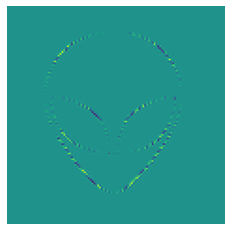

In [11]:
## Compare with alien

EMD = wav_EMD(barycenter,alien)

Lower_band = quantile[0]
Upper_band = quantile[1]
    
if EMD >= Lower_band and EMD <= Upper_band:
    print('We accept that this is an alien')
        
else:
    print('we reject that this is an alien')

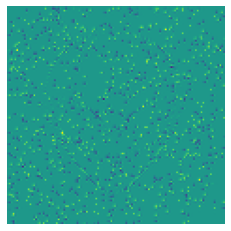

In [12]:
## ROC curve

# create test set

max_amount = 0.04
amount = 0
test_image = []
test_size = 5

for i in range(test_size):
    amount = amount + max_amount/test_size
    test_image.append(pep_salt(alien,amount))
    
# compare all aliens

comp_alien = []

for i in range(test_size):
    comp_alien.append(wav_EMD(barycenter,test_image[i]))
    

In [13]:
sim = 4
subset = int(test_size/sim)
true_positive_rate = []
false_positive_rate = []
s = 0

for i in range(sim):
    a,b = true_false_rate(comp_alien[s:subset+s],Lower_band,Upper_band,subset)
    true_positive_rate.append(a)
    false_positive_rate.append(b)
    s = subset + s

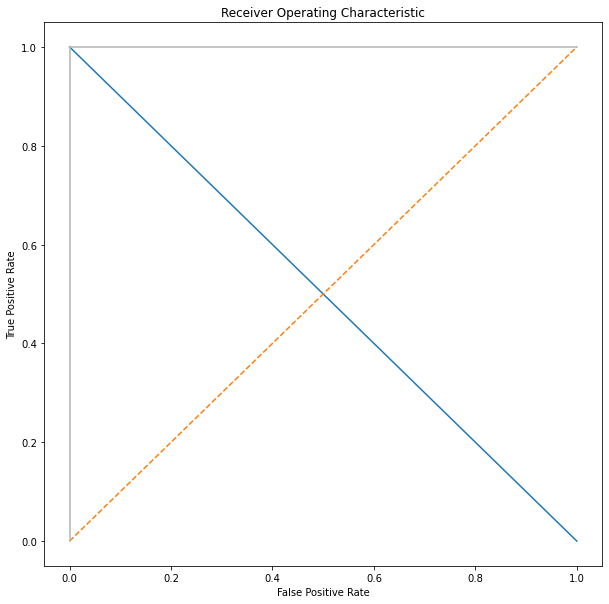

In [14]:
## Plot the ROC curve

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

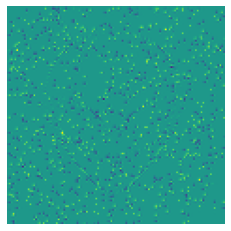

In [15]:
## ROC curve for apple

# create test set

test_image_apple = []

for i in range(test_size):
    amount = amount + max_amount/test_size
    test_image_apple.append(pep_salt(apple,amount))
    
# compare all aliens

comp_apple = []

for i in range(test_size):
    comp_apple.append(wav_EMD(barycenter,test_image[i]))

In [16]:
true_positive_rate1 = []
false_positive_rate1 = []
s = 0

for i in range(sim):
    a,b = true_false_rate(comp_apple[s:subset+s],Lower_band,Upper_band,subset)
    true_positive_rate1.append(a)
    false_positive_rate1.append(b)
    s = subset + s

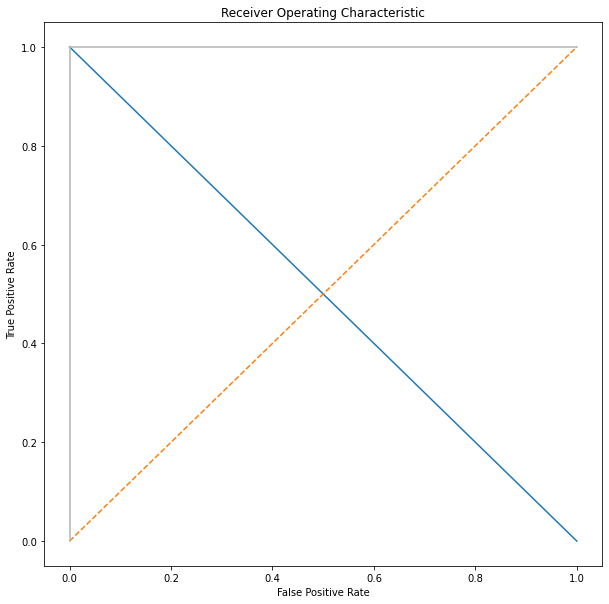

In [20]:
## Plot the ROC curve

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(true_positive_rate1, false_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()